# Aortic Disease Prediction with Statlog Dataset

***Name: Saransh Shukla  
Batch: DST 20823   
Submitted to: [Mr. Kevin Shah](https://www.linkedin.com/in/kevinshah99/)***

## Problem Statement
#### Despite the advancements in medical imaging and diagnostic techniques, the early detection and prediction of Aortic diseases remain challenging. The utilization of machine learning algorithms presents an opportunity to enhance predictive models using the Statlog dataset. However, developing accurate and reliable machine learning models for Aortic Disease Prediction requires addressing various challenges such as data heterogeneity, feature selection, and model interpretability. This project aims to explore and overcome these challenges to develop a robust and clinically relevant predictive model for Aortic diseases using the Statlog dataset.

### 1. Implement a system that can classify the absence (1) or presence (2) of heart disease (binary classification) 

In [1]:
# imports necessary libraries, and sets the warning filter to ignore all warning messages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv') # reads the csv file and creates the dataframe called "data"

In [3]:
data

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [4]:
# total  number of rows and columns
data.shape 

(270, 14)

In [5]:
data.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


Attribute Information:
------------------------
-- 1. age       
-- 2. sex       
-- 3. chest pain type  (4 values)       
-- 4. resting blood pressure  
-- 5. serum cholestoral in mg/dl      
-- 6. fasting blood sugar > 120 mg/dl       
-- 7. resting electrocardiographic results  (values 0,1,2) 
-- 8. maximum heart rate achieved  
-- 9. exercise induced angina    
-- 10. oldpeak = ST depression induced by exercise relative to rest   
-- 11. the slope of the peak exercise ST segment     
-- 12. number of major vessels (0-3) colored by flourosopy        
-- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect    
-- 14. presence 1 or 2



In [6]:
# summary of the dataframe
data.describe() 

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [7]:
# concise summary of the dataframe
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             270 non-null    float64
 1   sex             270 non-null    float64
 2   chest_pain      270 non-null    float64
 3   blood_press     270 non-null    float64
 4   serum_chol      270 non-null    float64
 5   blood_sugar     270 non-null    float64
 6   electrocard     270 non-null    float64
 7   max_heart_rate  270 non-null    float64
 8   induced_ang     270 non-null    float64
 9   oldpeak         270 non-null    float64
 10  peak_st_seg     270 non-null    float64
 11  major_ves       270 non-null    float64
 12  thal            270 non-null    float64
 13  presence        270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


Another way to check null values:

In [8]:
# checks for null values
data.isnull().sum()

age               0
sex               0
chest_pain        0
blood_press       0
serum_chol        0
blood_sugar       0
electrocard       0
max_heart_rate    0
induced_ang       0
oldpeak           0
peak_st_seg       0
major_ves         0
thal              0
presence          0
dtype: int64

There are no null values in the dataset

## Split `Train` and `Test` data from the dataset in ratio of 80:20

80% to 20%

In [9]:
# splits the data into training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42) 
print('Training data:', train_set.shape)
print('Test data: ', test_set.shape)

Training data: (216, 14)
Test data:  (54, 14)


In [10]:
# Preserve COPY of data
train_set_COPY = train_set.copy()
test_set_COPY = test_set.copy()

## Data analysis

In [11]:
data = train_set.copy()

`pairplot` is a function in the Seaborn library in Python. It creates a grid of Axes such that each variable in your data will be shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

Plot pairwise relationships between variables within a dataset

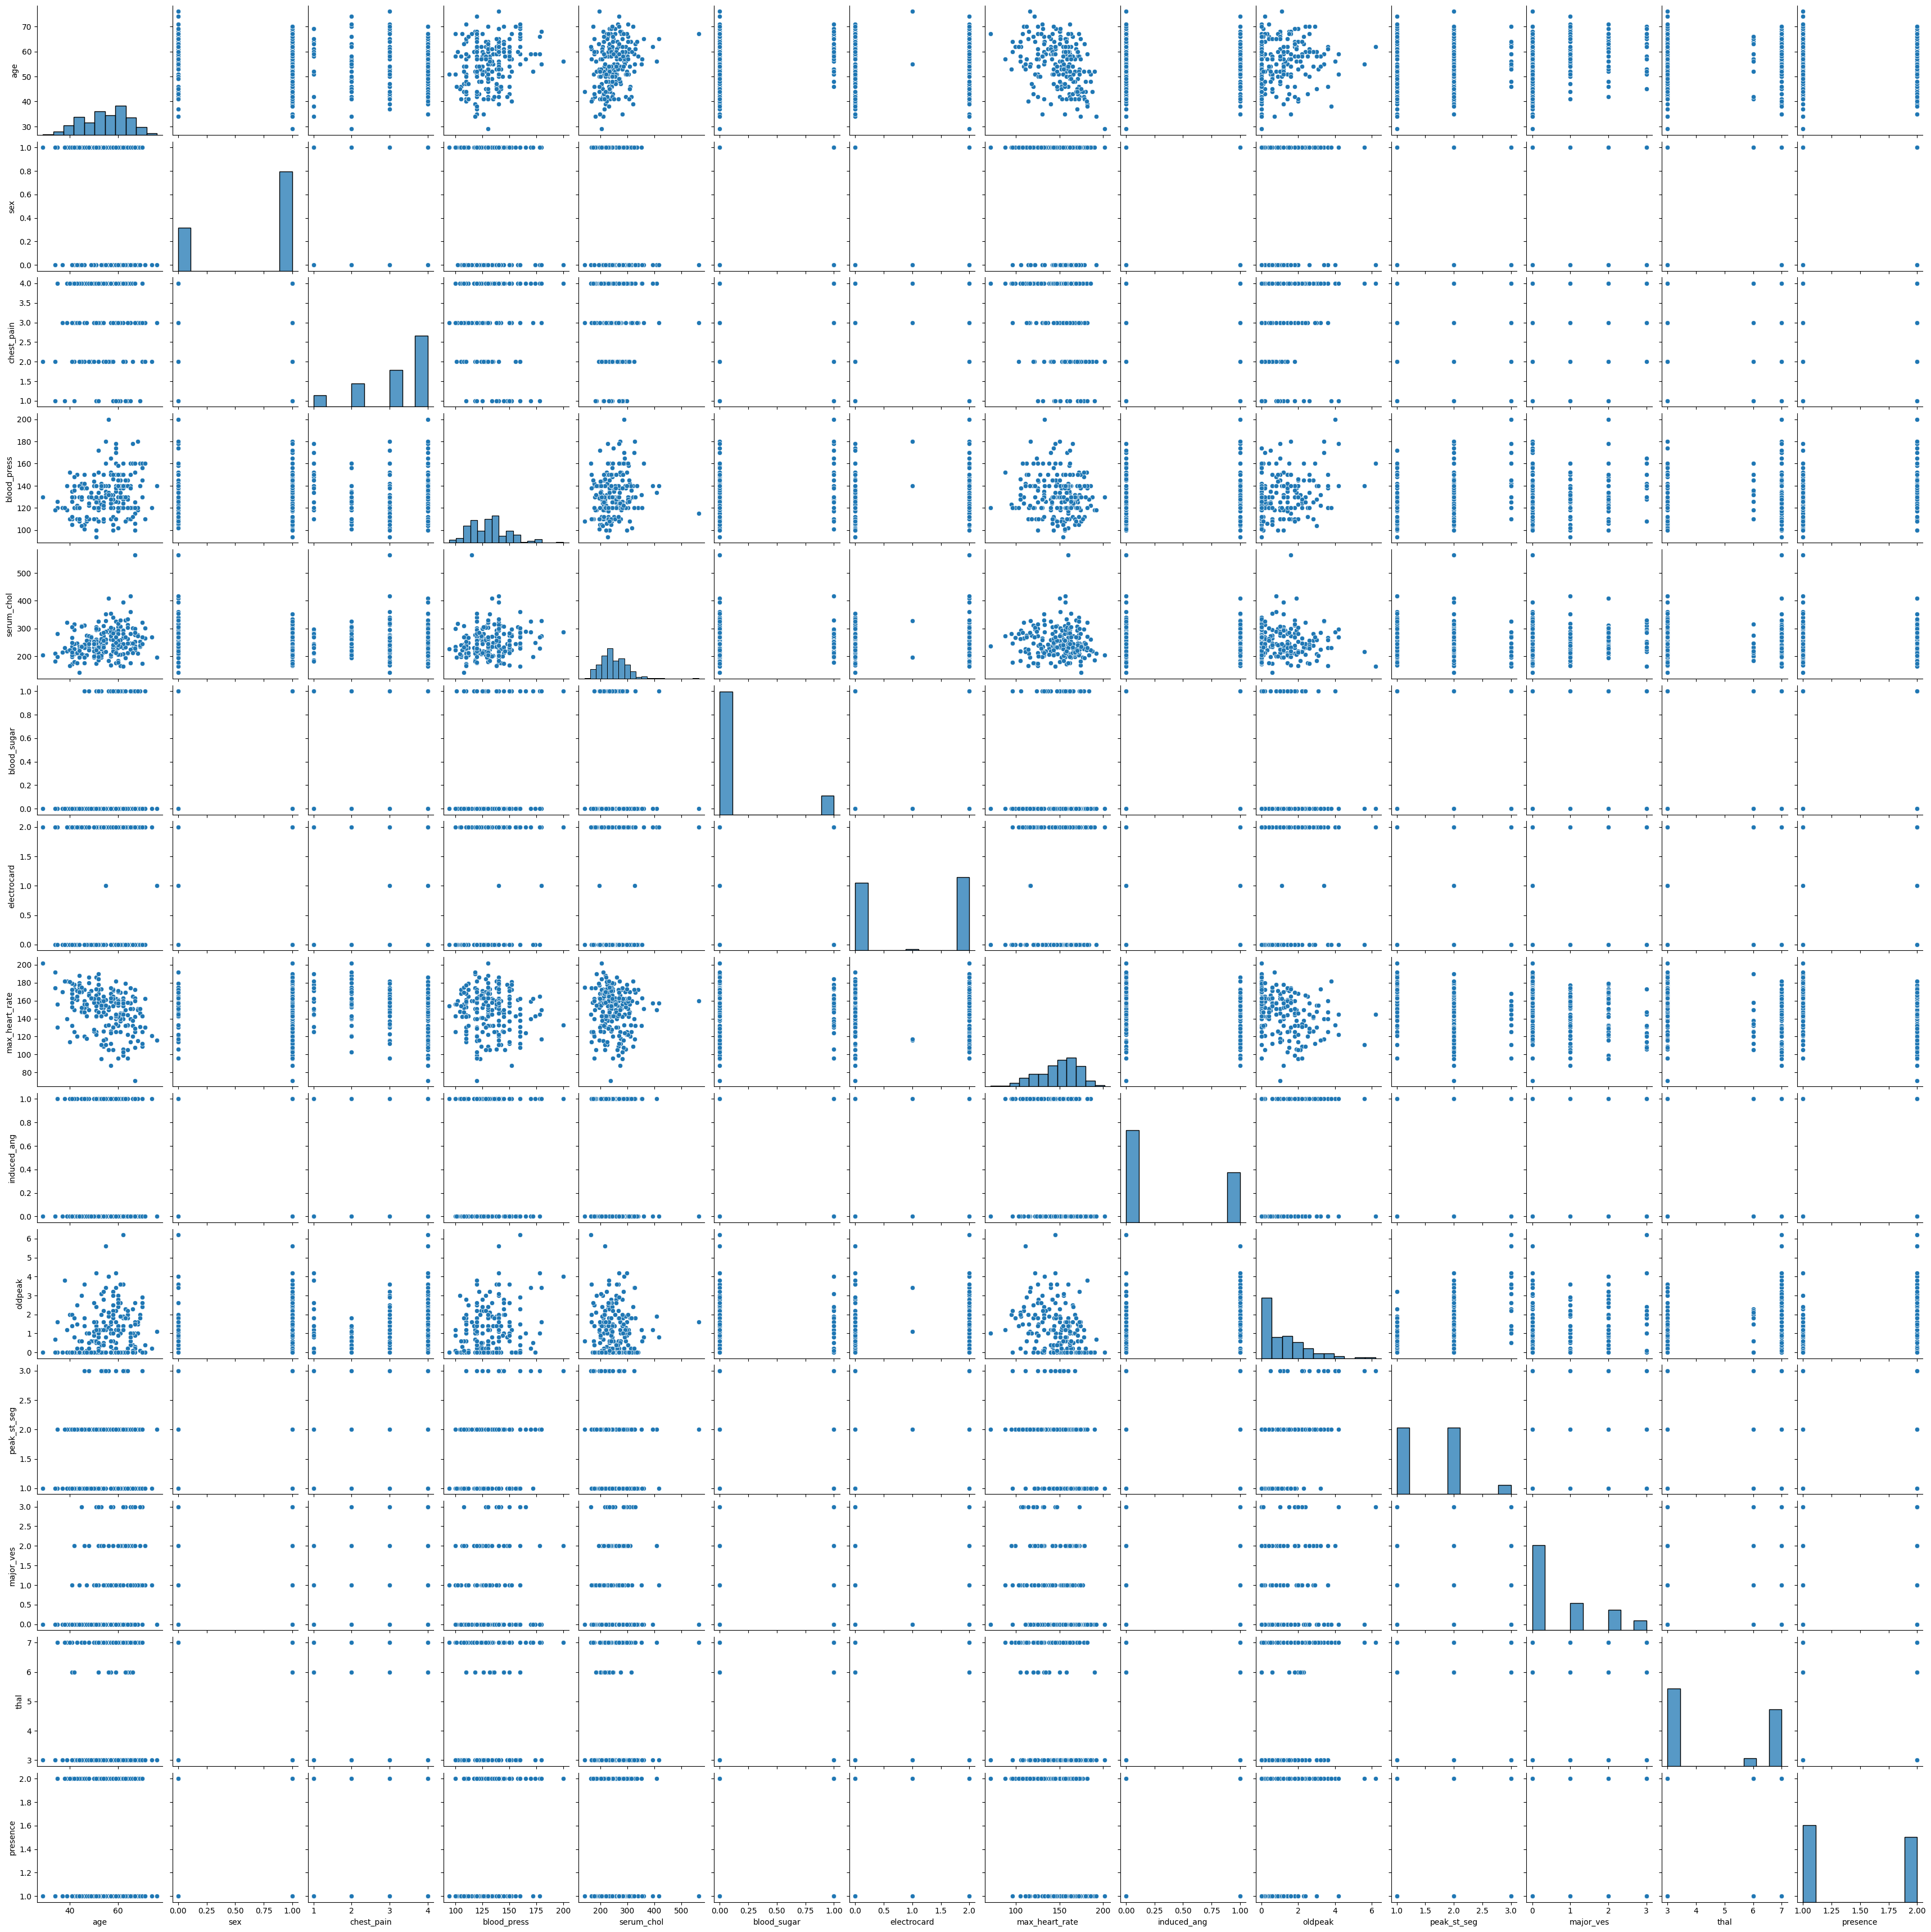

In [12]:
sns.pairplot(data)

More clear look:

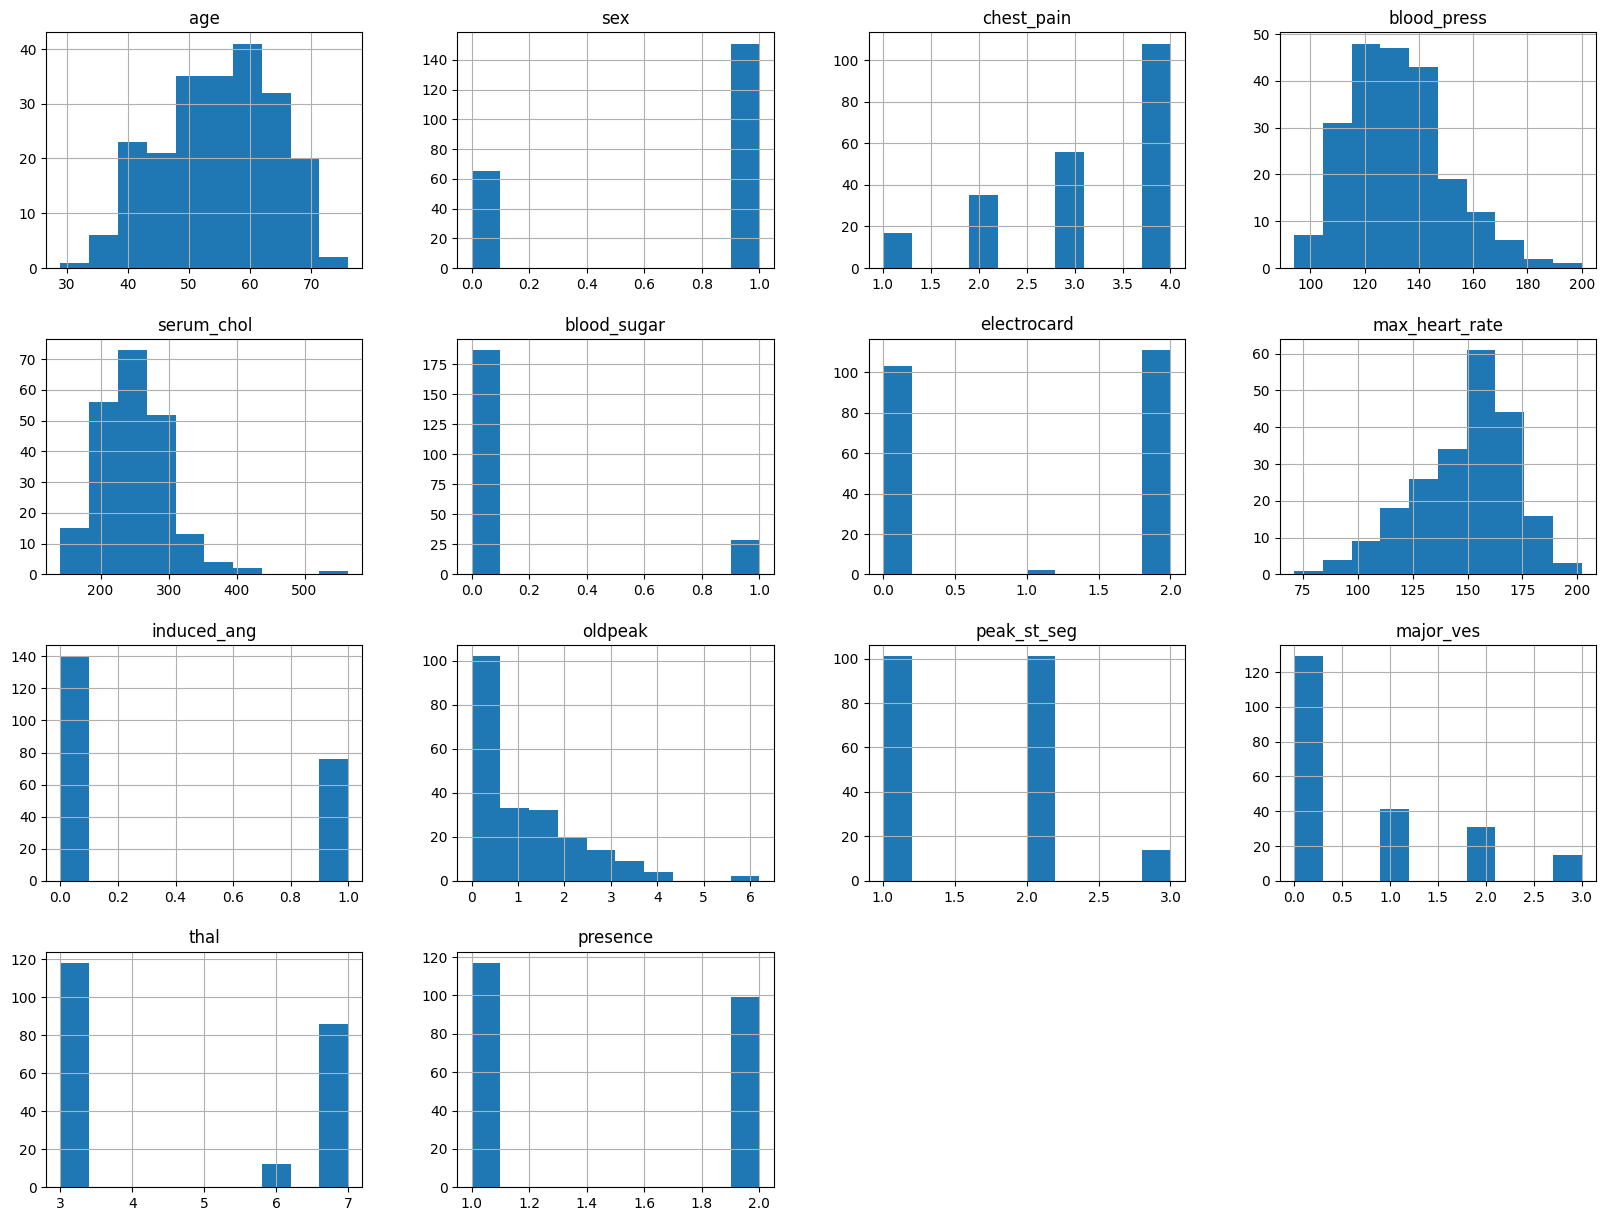

In [13]:
data.hist(figsize=(20,15)) # plots a histogram for each numerical attribute
plt.show()

Let's analyze correlations among features

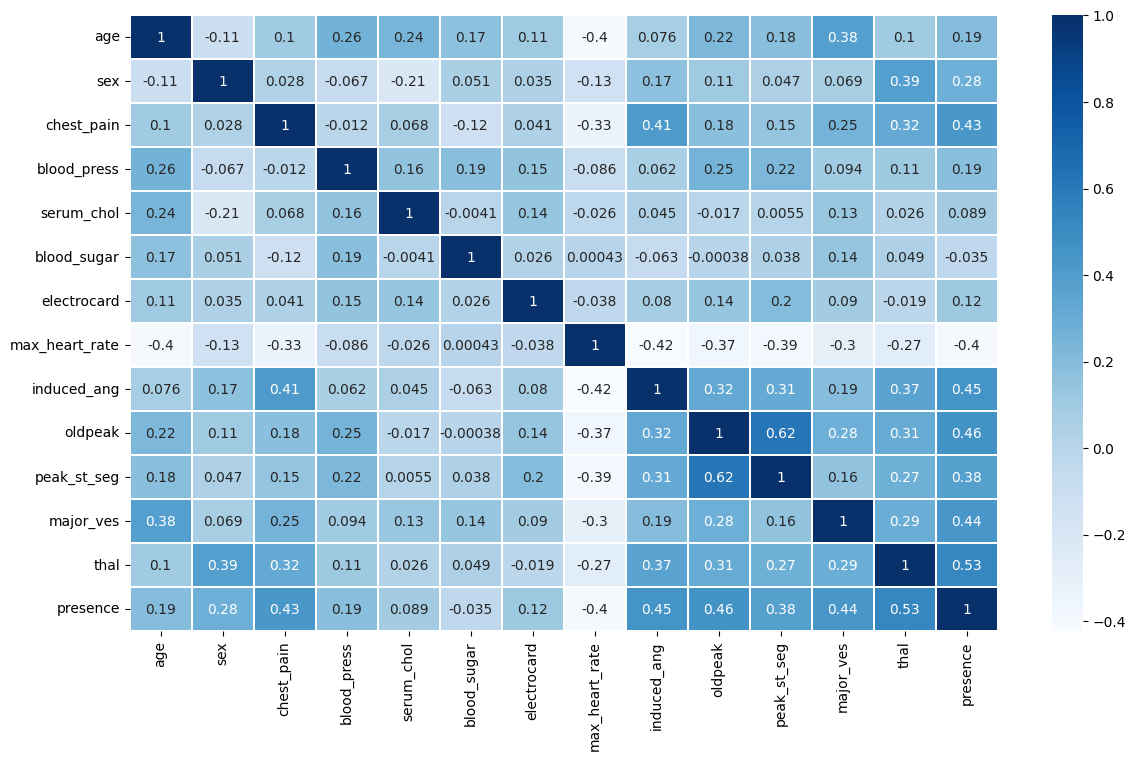

In [14]:
corr_matrix = data.corr() # creates a correlation matrix for the dataframe

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, linewidths=.01, annot = True, cmap='Blues')
plt.show()

In [15]:
# sorts the correlation matrix by the target variable
corr_matrix['presence'].sort_values(ascending=False) 

presence          1.000000
thal              0.530005
oldpeak           0.455766
induced_ang       0.450750
major_ves         0.437676
chest_pain        0.431482
peak_st_seg       0.379881
sex               0.279393
age               0.193232
blood_press       0.186431
electrocard       0.115210
serum_chol        0.088730
blood_sugar      -0.035203
max_heart_rate   -0.402942
Name: presence, dtype: float64

We can clearly see that most of the features affect the presence of heart disease

The strongest correlation is with **thal, oldpeak, included_ang, major_ves, chest_pain and max_heart_rate**

The weakest correlation is with **serum_chol and blood_sugar**

## Separate data from labels and standartization

In [16]:
data_labels = data['presence'].copy() # creates a copy of the target variable from train set

In [17]:
data_labels.head()

115    1
33     2
184    1
142    2
197    1
Name: presence, dtype: int64

In [18]:
data = data.drop('presence', axis=1)

In [19]:
data.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal
115,49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0
33,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0
184,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
142,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0
197,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0


A `Pipeline` in Scikit-learn is a tool that simplifies the process of building and evaluating data transformations and models.

It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be transformers (i.e., they must implement fit and transform methods), and the final estimator only needs to implement fit.

The main benefits of using a pipeline include:

1. **Convenience and encapsulation**: You only have to call fit and predict once on your data to fit a whole sequence of estimators.
2. **Joint parameter selection**: You can grid search over parameters of all estimators in the pipeline at once.
3. **Safety**: Pipelines help avoid leaking statistics from your test data into the trained model during cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

A machine learning pipeline is the end-to-end construct that orchestrates the flow of data into, and output from, a machine learning model (or set of multiple models). It includes raw data input, features, outputs, the machine learning model and model parameters, and prediction outputs.

In [20]:
# creates a pipeline for numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([ 
        ('std_scaler', StandardScaler()), # standardizes the data using StandardScaler in the pipeline
    ])

In [21]:
num_attributes = list(data.columns) # creates a list of numerical attributes
transform_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes), # applies the pipeline to the numerical attributes
    ])

`ColumnTransformer` is a utility class in the `sklearn.compose` module of the Scikit-learn library. It's used to apply different preprocessing steps to different columns of a dataset within a pipeline.

ColumnTransformer is used when you want to apply different preprocessing steps to different columns of your data within a pipeline.

In [22]:
data_prepared = transform_pipeline.fit_transform(data) # applies the pipeline to the dataframe and creates a numpy array

In [23]:
data_prepared

array([[-0.63296991, -1.52416434, -1.21490572, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [ 0.46519475,  0.65609723,  0.8432875 , ...,  2.30559959,
        -0.71458405,  1.15321806],
       [-0.19370404,  0.65609723, -0.18580911, ..., -0.98159191,
         2.4141353 , -0.90541914],
       ...,
       [ 0.24556182, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914],
       [-0.41333698,  0.65609723, -0.18580911, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [-0.63296991, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914]])

In [24]:
data_prepared.shape

(216, 13)

In [25]:
data.shape

(216, 13)

In [26]:
data_labels.shape

(216,)

# Training

4 classification algorithms (Logistic regression, SVM, decision tree, KNN) 
- Evaluate the algorithms using the following metrics( accuracy, precision, recall, and F1)

Here are the definitions of accuracy, precision, recall, and F1 score:

1. **Accuracy**: This is the ratio of correctly predicted observations to the total observations. It is a useful measure only when the class distribution of the data is similar.

2. **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to a low false positive rate.

3. **Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations to all actual positives. It is important when the cost of false negatives is high.

4. **F1 Score**: The F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. It is useful in the uneven class distribution to seek a balance between Recall and Precision.

In [27]:
# This function calculates and returns the accuracy, precision, recall, and F1 score of the model predictions.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_on_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, precision, recall, f1

## Logistic regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [28]:
# creates a logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(data_prepared, data_labels) # fits the model to the training data

LogisticRegression()

In [29]:
# makes predictions on the training data
log_predictions = log_reg.predict(data_prepared) 

In [30]:
log_accuracy, log_precision, log_recall, log_f1 = evaluate_on_metrics(data_labels, log_predictions) # evaluates the predictions

print('LOGISTIC REGRESSION PERFORMANCE ON TRAINING DATASET')
print('Accuracy: ', log_accuracy,'\nPrecision: ', log_precision, '\nRecall: ', log_recall, '\nF1 score: ', log_f1) # prints the performance metrics

LOGISTIC REGRESSION PERFORMANCE ON TRAINING DATASET
Accuracy:  0.8379629629629629 
Precision:  0.8416666666666667 
Recall:  0.8632478632478633 
F1 score:  0.8523206751054853


In [31]:
# A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class
# It helps in understanding the classes that are being confused by model as other class.

from sklearn.metrics import confusion_matrix

print ("Confusion matrix:")
print (confusion_matrix(data_labels, log_predictions))

Confusion matrix:
[[101  16]
 [ 19  80]]



Confusion matrix explained

|#|Predicted 1| Predicted 2|
|--------|-----------|------------|
|Actual 1| 101       |16          |
|Actual 2| 19        |80          |



Terminology

True negative (TN): correctly predicted the patient has NO heart disease (actual value: No disease).

True positive (TP): correctly predicted patient has heart disease(actual value: disease).

False negative (FN): incorrectly predicted patient has NO heart disease (actual value: disease).

False positive (FP): incorrectly predicted patient has heart disease (actual value: No disease).


# SVM

Support Vector Machine (SVM) is a type of supervised machine learning model used for classification and regression analysis. It is based on the idea of finding a hyperplane that best separates the features into different classes.

In the context of the code you provided:
- `SVC(gamma='scale')` creates an instance of the SVM classifier. The `gamma` parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. When it's set to 'scale', it uses 1 / (n_features * X.var()) as the value of gamma.

- `svm.fit(data_prepared, data_labels)` trains the SVM classifier on the prepared data (`data_prepared`) and the corresponding labels (`data_labels`). After this line, the `svm` object is a trained model that can be used to make predictions.

The essence of SVMs simply involves finding a boundary that separates different classes from each other.

- In 2-dimensional space, the boundary is called a line.
- In 3-dimensional space, the boundary is called a plane.
- In any dimension greater than 3, the boundary is called a hyperplane.

In [32]:
from sklearn.svm import SVC # Support Vector Classifier
svm = SVC(gamma='scale')
svm.fit(data_prepared, data_labels)

SVC()

In [33]:
svm_predictions = svm.predict(data_prepared) # makes predictions on the training data

In [34]:
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_on_metrics(data_labels, svm_predictions)

print('SVM PERFORMANCE ON TRAINING DATASED')
print('Accuracy: ', svm_accuracy,'\nPrecision: ', svm_precision, '\nRecall: ', svm_recall, '\nF1 score: ', svm_f1)

SVM PERFORMANCE ON TRAINING DATASED
Accuracy:  0.9074074074074074 
Precision:  0.907563025210084 
Recall:  0.9230769230769231 
F1 score:  0.9152542372881355


In [35]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, svm_predictions))

Confusion matrix:
[[108   9]
 [ 11  88]]


- Seems like SVM performs better than Logistic Regression

## Decision Tree Classifier

A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal nodetests on  attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction.


A decision tree has several key attributes:

1. **Root Node**: This is the topmost node that represents the entire population or sample. It further gets divided into two or more homogeneous sets.

2. **Splitting**: It is a process of dividing a node into two or more sub-nodes.

3. **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.

4. **Leaf/Terminal Node**: Nodes that do not split are called Leaf or Terminal nodes.

5. **Pruning**: The process of removing sub-nodes of a decision node is called pruning. This is the opposite process of splitting.

6. **Branch/Sub-Tree**: A subsection of the entire tree is called a branch or sub-tree.

7. **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes where sub-nodes are the children of a parent node.

These attributes are used to construct and navigate the decision tree to make predictions based on input data.


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(data_prepared, data_labels)

DecisionTreeClassifier(random_state=42)

In [37]:
tree_class_predictions = tree_class.predict(data_prepared)

In [38]:
tree_class_accuracy, tree_class_precision, tree_class_recall, tree_class_f1 = evaluate_on_metrics(data_labels, tree_class_predictions)

print('DECISION TREE PERFORMANCE ON TRAINING DATASET')
print('Accuracy: ', tree_class_accuracy,'\nPrecision: ', tree_class_precision, '\nRecall: ', tree_class_recall, '\nF1 score: ', tree_class_f1)

DECISION TREE PERFORMANCE ON TRAINING DATASET
Accuracy:  1.0 
Precision:  1.0 
Recall:  1.0 
F1 score:  1.0


In [39]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, tree_class_predictions))

Confusion matrix:
[[117   0]
 [  0  99]]


It's 100% accuracy! But chances are we have overfitting problem.

> Overfitting and underfitting are common problems in machine learning related to how well a model can generalize to unseen data based on its training.
>
> 1. **Overfitting**: Overfitting occurs when a model learns the training data too well. It captures not only the underlying patterns but also the noise and outliers in the data. As a result, it performs very well on the training data but poorly on new, unseen data. This is often a result of an overly complex model with too many parameters.
> 
> 2. **Underfitting**: Underfitting is the opposite of overfitting. It occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training data and unseen data. This is often a result of a model with too few parameters.
>
> To achieve a good balance and avoid both overfitting and underfitting, techniques like cross-validation, regularization, and pruning can be used. It's also important to choose the right level of complexity for your model based on the complexity of the data.

Generate classification tree for Decision Tree Classifier:

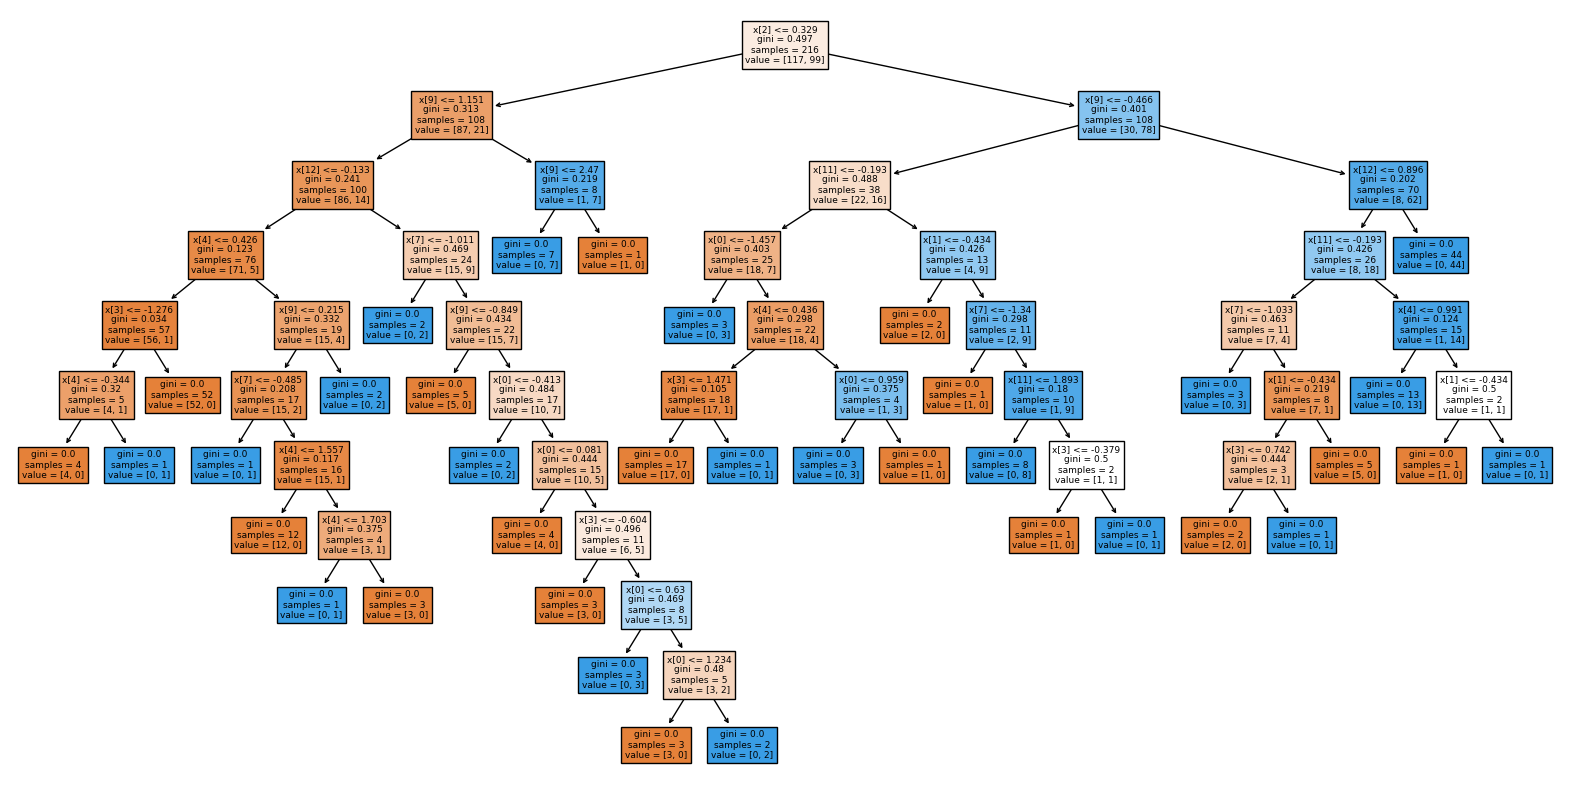

In [40]:
# Assuming tree_class is your trained decision tree model 
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_class, filled=True)
plt.show()

## K-Nearest Neighbors

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. In other words, similar things are near to each other.

In [41]:
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_prepared, data_labels)

KNeighborsClassifier(n_neighbors=3)



In this code:

- `KNeighborsClassifier(n_neighbors=3)`: This line is creating an instance of the KNN classifier. The `n_neighbors` parameter is set to `3`, which means that the classifier will consider the 3 nearest neighbors when making a prediction.

- `knn.fit(data_prepared, data_labels)`: This line is training the KNN classifier on the prepared data (`data_prepared`) and the corresponding labels (`data_labels`). After this line, the `knn` object is a trained model that can be used to make predictions.

In [42]:
knn_predictions = knn.predict(data_prepared)

In [43]:
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_on_metrics(data_labels, knn_predictions)

print('K-NEARESR NEIGHBORS PERFORMANCE ON TRAINING DATASED')
print('Accuracy: ', knn_accuracy,'\nPrecision: ', knn_precision, '\nRecall: ',knn_recall, '\nF1 score: ', knn_f1)

K-NEARESR NEIGHBORS PERFORMANCE ON TRAINING DATASED
Accuracy:  0.8935185185185185 
Precision:  0.8983050847457628 
Recall:  0.905982905982906 
F1 score:  0.902127659574468


In [44]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, knn_predictions))

Confusion matrix:
[[106  11]
 [ 12  87]]


# Naive Bayes

The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

### Disadvantages of Naïve Bayes Classifier:
- Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

### Applications of Naïve Bayes Classifier:
- It is used for Credit Scoring.
- It is used in medical data classification.
- It can be used in real-time predictions because Naïve Bayes Classifier is an eager learner.
- It is used in Text classification such as Spam filtering and Sentiment analysis.

In [45]:
# Implement naive bayes classifier
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(data_prepared, data_labels)

GaussianNB()

In [46]:
nb_predictions = nb.predict(data_prepared)

In [47]:
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_on_metrics(data_labels, nb_predictions)

print('NAIVE BAYES PERFORMANCE ON TRAINING DATASED')
print('Accuracy: ', nb_accuracy,'\nPrecision: ', nb_precision, '\nRecall: ', nb_recall, '\nF1 score: ', nb_f1)

NAIVE BAYES PERFORMANCE ON TRAINING DATASED
Accuracy:  0.8611111111111112 
Precision:  0.8717948717948718 
Recall:  0.8717948717948718 
F1 score:  0.8717948717948718


In [48]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, nb_predictions))

Confusion matrix:
[[102  15]
 [ 15  84]]


# Evaluate on `test` dataset

In [49]:
data_test = test_set.copy() # creates a copy of the test set to make predictions on it

In [50]:
data_test.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
30,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,2
116,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,2
79,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,1
127,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,1
196,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0,1


In [51]:
data_test_labels = data_test['presence'].copy()

In [52]:
data_test = data_test.drop(['presence'], axis=1)

In [53]:
data_test.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal
30,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0
116,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0
79,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
127,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0
196,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0


In [54]:
data_test_labels.head()

30     2
116    2
79     1
127    1
196    1
Name: presence, dtype: int64

In [55]:
data_test_prepared = transform_pipeline.fit_transform(data_test) # applies the pipeline to the test set

In [56]:
data_test_prepared

array([[ 4.36240809e-01,  8.29156198e-01, -1.74740811e-01,
        -9.31800277e-02, -3.54583616e-01, -5.05780539e-01,
         1.03774904e+00, -8.59434659e-02, -5.63092506e-01,
        -4.67153505e-01,  7.34976290e-01,  4.47213595e-01,
         1.35060650e+00],
       [-7.97697479e-01,  8.29156198e-01,  1.00475967e+00,
        -5.45469601e-01,  2.49508788e-02, -5.05780539e-01,
         1.03774904e+00, -3.34565635e-01, -5.63092506e-01,
        -6.02778716e-02, -8.52572496e-01, -7.02764221e-01,
         1.35060650e+00],
       [ 3.24064601e-01,  8.29156198e-01, -1.35424129e+00,
        -5.45469601e-01, -2.21746543e-01, -5.05780539e-01,
        -9.63624112e-01,  1.07429332e+00, -5.63092506e-01,
        -6.02778716e-02, -8.52572496e-01, -7.02764221e-01,
        -7.63386285e-01],
       [-1.24640231e-01, -1.20604538e+00, -1.74740811e-01,
         3.59109545e-01, -9.80815532e-01, -5.05780539e-01,
         1.03774904e+00,  7.01360070e-01, -5.63092506e-01,
        -7.72310230e-01,  7.34976290e

In [57]:
data_test_prepared.shape

(54, 13)

## Prediction with Logistic Regression

In [58]:
log_predictions = log_reg.predict(data_test_prepared)

In [59]:
log_accuracy, log_precision, log_recall, log_f1 = evaluate_on_metrics(data_test_labels, log_predictions)

print('LOGISTIC REGRESSION PERFORMANCE ON TEST DATASED')
print('Accuracy: ', log_accuracy,'\nPrecision: ', log_precision, '\nRecall: ', log_recall, '\nF1 score: ', log_f1)

LOGISTIC REGRESSION PERFORMANCE ON TEST DATASED
Accuracy:  0.8703703703703703 
Precision:  0.9333333333333333 
Recall:  0.8484848484848485 
F1 score:  0.888888888888889


In [60]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, log_predictions))

Confusion matrix:
[[28  5]
 [ 2 19]]


## Prediction with SVM

In [61]:
svm_predictions = svm.predict(data_test_prepared)

In [62]:
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_on_metrics(data_test_labels, svm_predictions)

print('SVM PERFORMANCE ON TEST DATASET')
print('Accuracy: ', svm_accuracy,'\nPrecision: ', svm_precision, '\nRecall: ', svm_recall, '\nF1 score: ', svm_f1)

SVM PERFORMANCE ON TEST DATASET
Accuracy:  0.8518518518518519 
Precision:  0.9310344827586207 
Recall:  0.8181818181818182 
F1 score:  0.8709677419354839


In [63]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, svm_predictions))

Confusion matrix:
[[27  6]
 [ 2 19]]


## Prediction with Decision Tree

In [64]:
tree_class_predictions = tree_class.predict(data_test_prepared)

In [65]:
tree_class_accuracy, tree_class_precision, tree_class_recall, tree_class_f1 = evaluate_on_metrics(data_test_labels, tree_class_predictions)

print('DECISION TREE PERFORMANCE ON TEST DATASET')
print('Accuracy: ', tree_class_accuracy,'\nPrecision: ', tree_class_precision, '\nRecall: ', tree_class_recall, '\nF1 score: ', tree_class_f1)

DECISION TREE PERFORMANCE ON TEST DATASET
Accuracy:  0.7037037037037037 
Precision:  0.8148148148148148 
Recall:  0.6666666666666666 
F1 score:  0.7333333333333333


In [66]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, tree_class_predictions))

Confusion matrix:
[[22 11]
 [ 5 16]]


Decision Tree seems to perform bad on TEST set.

I think, this happened because of overfitting on TRAIN set. 

## Prediction with KNN

In [67]:
knn_predictions = knn.predict(data_test_prepared)

In [68]:
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_on_metrics(data_test_labels, knn_predictions)

print('K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET')
print('Accuracy: ', knn_accuracy,'\nPrecision: ', knn_precision, '\nRecall: ',knn_recall, '\nF1 score: ', knn_f1)

K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET
Accuracy:  0.8333333333333334 
Precision:  0.875 
Recall:  0.8484848484848485 
F1 score:  0.8615384615384615


In [69]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, knn_predictions))

Confusion matrix:
[[28  5]
 [ 4 17]]


# Prediction with Naive Bayes

In [70]:
nb_predictions = nb.predict(data_test_prepared)

In [71]:
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_on_metrics(data_test_labels, nb_predictions)

print('NAIVE BAYES PERFORMANCE ON TEST DATASET')
print('Accuracy: ', nb_accuracy,'\nPrecision: ', nb_precision, '\nRecall: ', nb_recall, '\nF1 score: ', nb_f1)

NAIVE BAYES PERFORMANCE ON TEST DATASET
Accuracy:  0.8703703703703703 
Precision:  0.90625 
Recall:  0.8787878787878788 
F1 score:  0.8923076923076922


In [72]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, nb_predictions))

Confusion matrix:
[[29  4]
 [ 3 18]]


# Overall evaluation

Create a dictionary of classifiers

In [73]:
classifier_collection = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB()
}

Dictionaries of scores

In [74]:
accuracy_score_dict = {}
precision_score_dict = {}
recall_score_dict = {}
f1_score_dict = {}
roc_auc_dict = {}
confusion_matrix_dict = {}

Previously, each model was trained individually. Now, all models will trained concurrently and their scores will be obtained.

In [75]:

count=0

for classifier_model, classifier in (classifier_collection.items()):

    count +=1
    classifier.fit(data_prepared,data_labels)
    predicted = classifier.predict(data_test_prepared)
    accuracy_score_dict[classifier_model] = {'accuracy_score' :  accuracy_score(data_test_labels, predicted)}
    precision_score_dict[classifier_model] = {'precision_score' :  precision_score(data_test_labels, predicted)}
    recall_score_dict[classifier_model] = {'recall_score' :  recall_score(data_test_labels, predicted)}
    f1_score_dict[classifier_model] = {'f1_score' :  f1_score(data_test_labels, predicted)}
    confusion_matrix_dict[classifier_model] = {'matrix' : confusion_matrix(data_test_labels, predicted)}
    roc_auc_dict[classifier_model] = {'roc-auc' : roc_auc_score(data_test_labels, predicted)}

In [76]:
accuracy_score_dict

{'Logistic Regression': {'accuracy_score': 0.8703703703703703},
 'SVM': {'accuracy_score': 0.8518518518518519},
 'Decision Tree': {'accuracy_score': 0.7037037037037037},
 'Nearest Neighbors': {'accuracy_score': 0.8333333333333334},
 'Naive Bayes': {'accuracy_score': 0.8703703703703703}}

In [77]:
precision_score_dict

{'Logistic Regression': {'precision_score': 0.9333333333333333},
 'SVM': {'precision_score': 0.9310344827586207},
 'Decision Tree': {'precision_score': 0.8148148148148148},
 'Nearest Neighbors': {'precision_score': 0.875},
 'Naive Bayes': {'precision_score': 0.90625}}

In [78]:
recall_score_dict

{'Logistic Regression': {'recall_score': 0.8484848484848485},
 'SVM': {'recall_score': 0.8181818181818182},
 'Decision Tree': {'recall_score': 0.6666666666666666},
 'Nearest Neighbors': {'recall_score': 0.8484848484848485},
 'Naive Bayes': {'recall_score': 0.8787878787878788}}

In [79]:
f1_score_dict

{'Logistic Regression': {'f1_score': 0.888888888888889},
 'SVM': {'f1_score': 0.8709677419354839},
 'Decision Tree': {'f1_score': 0.7333333333333333},
 'Nearest Neighbors': {'f1_score': 0.8615384615384615},
 'Naive Bayes': {'f1_score': 0.8923076923076922}}

In [80]:
confusion_matrix_dict

{'Logistic Regression': {'matrix': array([[28,  5],
         [ 2, 19]], dtype=int64)},
 'SVM': {'matrix': array([[27,  6],
         [ 2, 19]], dtype=int64)},
 'Decision Tree': {'matrix': array([[22, 11],
         [ 5, 16]], dtype=int64)},
 'Nearest Neighbors': {'matrix': array([[28,  5],
         [ 4, 17]], dtype=int64)},
 'Naive Bayes': {'matrix': array([[29,  4],
         [ 3, 18]], dtype=int64)}}

In [81]:
roc_auc_dict

{'Logistic Regression': {'roc-auc': 0.8766233766233766},
 'SVM': {'roc-auc': 0.8614718614718614},
 'Decision Tree': {'roc-auc': 0.7142857142857143},
 'Nearest Neighbors': {'roc-auc': 0.8290043290043291},
 'Naive Bayes': {'roc-auc': 0.867965367965368}}

The ROC curve is produced by calculating and plotting the true positive rate against the false positive rate for a single classifier at a variety of thresholds. To plot the ROC curve, we need to calculate the TPR and FPR for many different thresholds (This step is included in all relevant libraries as scikit-learn ). 

Logistic Regression 0.8766233766233766
SVM 0.8614718614718614
Decision Tree 0.7142857142857143
Nearest Neighbors 0.8290043290043291
Naive Bayes 0.867965367965368


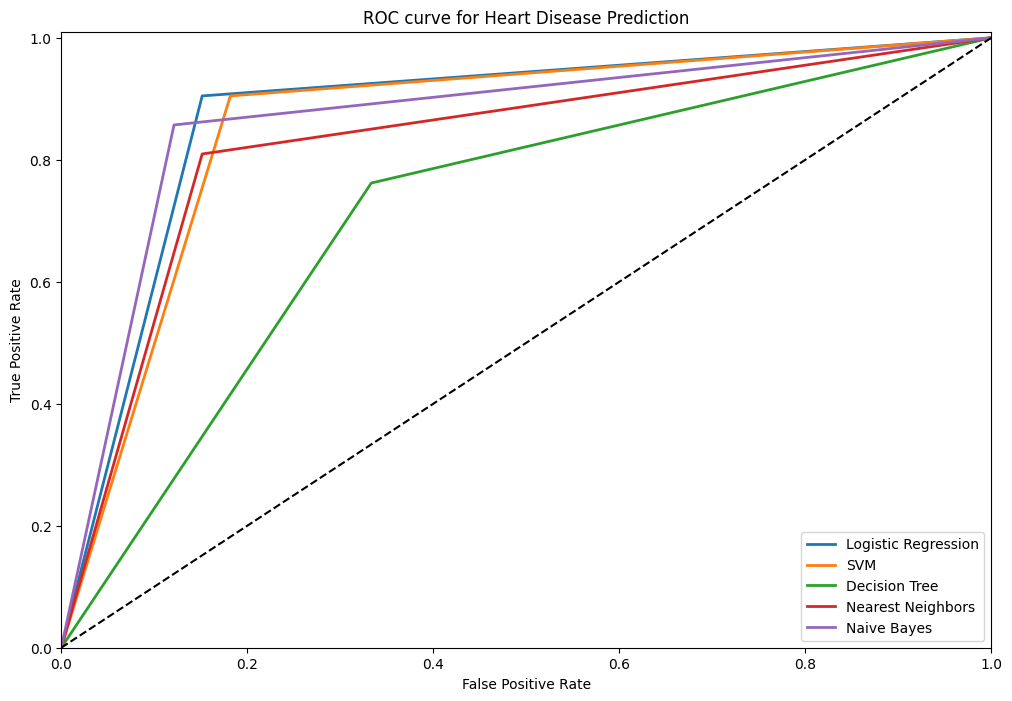

In [83]:
# generate a roc curve for each model and plot the area under the curve

from sklearn.metrics import roc_curve

plt.figure(figsize=(12,8))
for key, value in classifier_collection.items():
    model = value
    model.fit(data_prepared, data_labels)
    y_pred = model.predict(data_test_prepared)
    fpr, tpr, thresholds = roc_curve(data_test_labels, y_pred, pos_label=2)
    plt.plot(fpr, tpr, linewidth=2, label=key)
    print(key, roc_auc_score(data_test_labels, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1.01])
plt.title('ROC curve for Heart Disease Prediction')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Visualization of our results

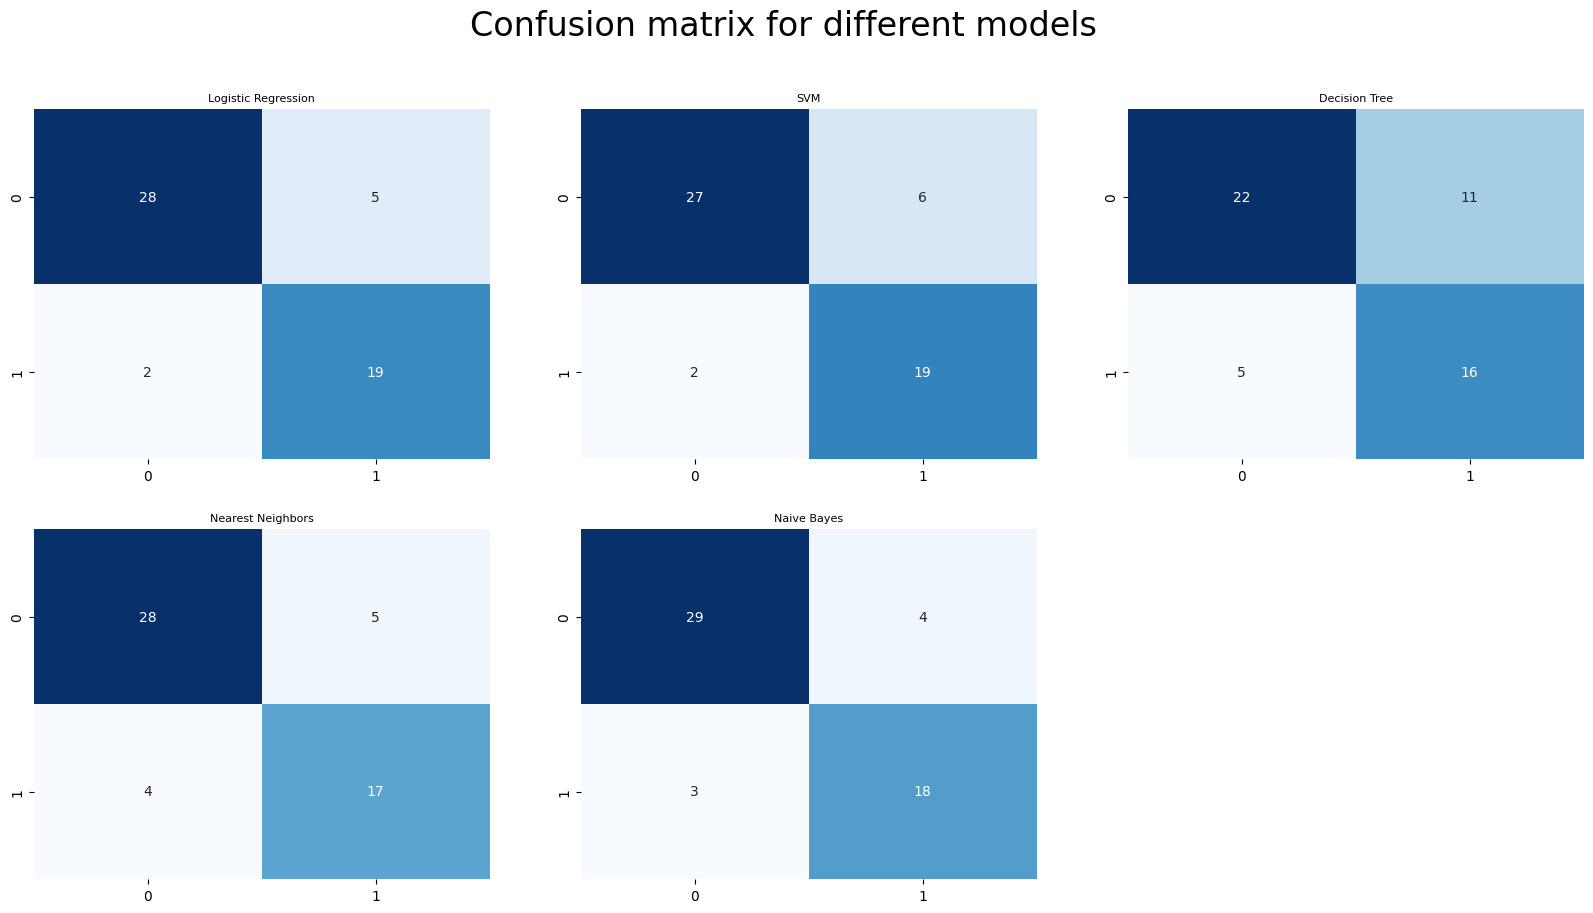

In [84]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion matrix for different models",fontsize=24)

n = 0
for classifier, class_score in confusion_matrix_dict.items():
    for item, score in class_score.items():
        n +=1
        plt.subplot(2, 3, n) 
        plt.title(classifier, fontsize=8)
        sns.heatmap(score,annot=True,cbar=False,cmap="Blues",fmt="d")

Our model better classifies THE ABSENCE of heart disease than its PRESENCE

(0.0, 1.0)

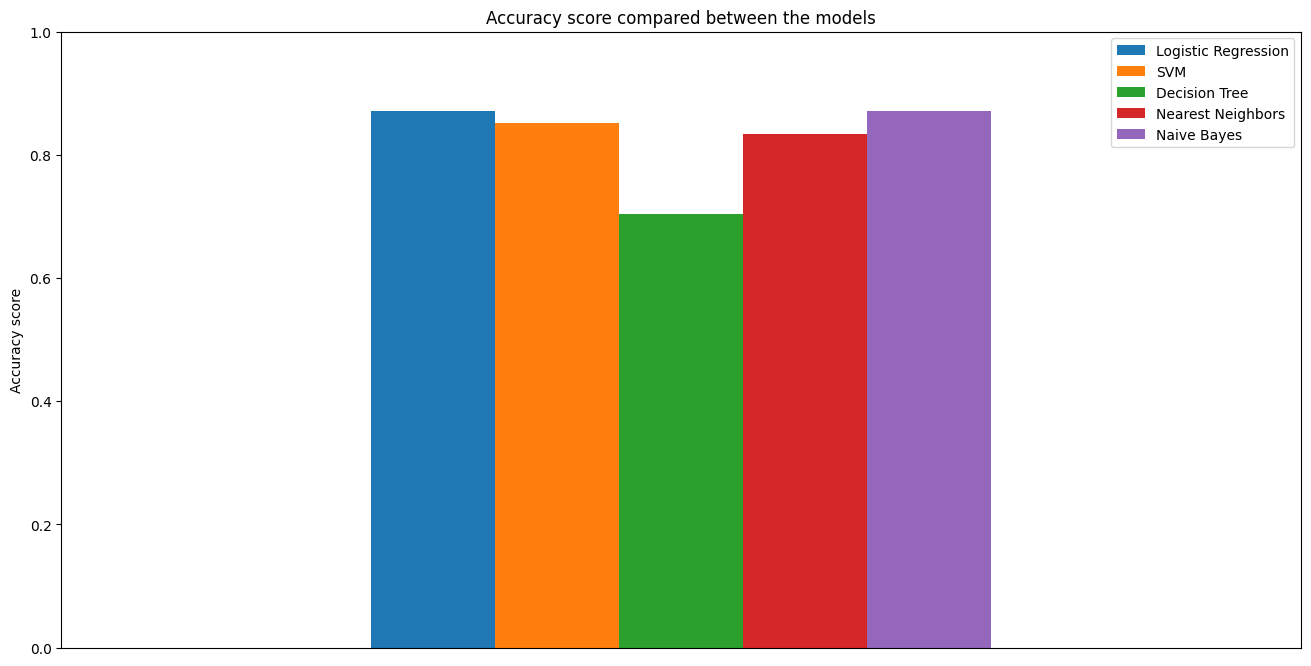

In [85]:
ax = pd.DataFrame(accuracy_score_dict).plot(kind='bar',
                                             figsize=(16,8),
                                             title="Accuracy score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Accuracy score")
ax.set_ylim(0,1)

(0.0, 1.0)

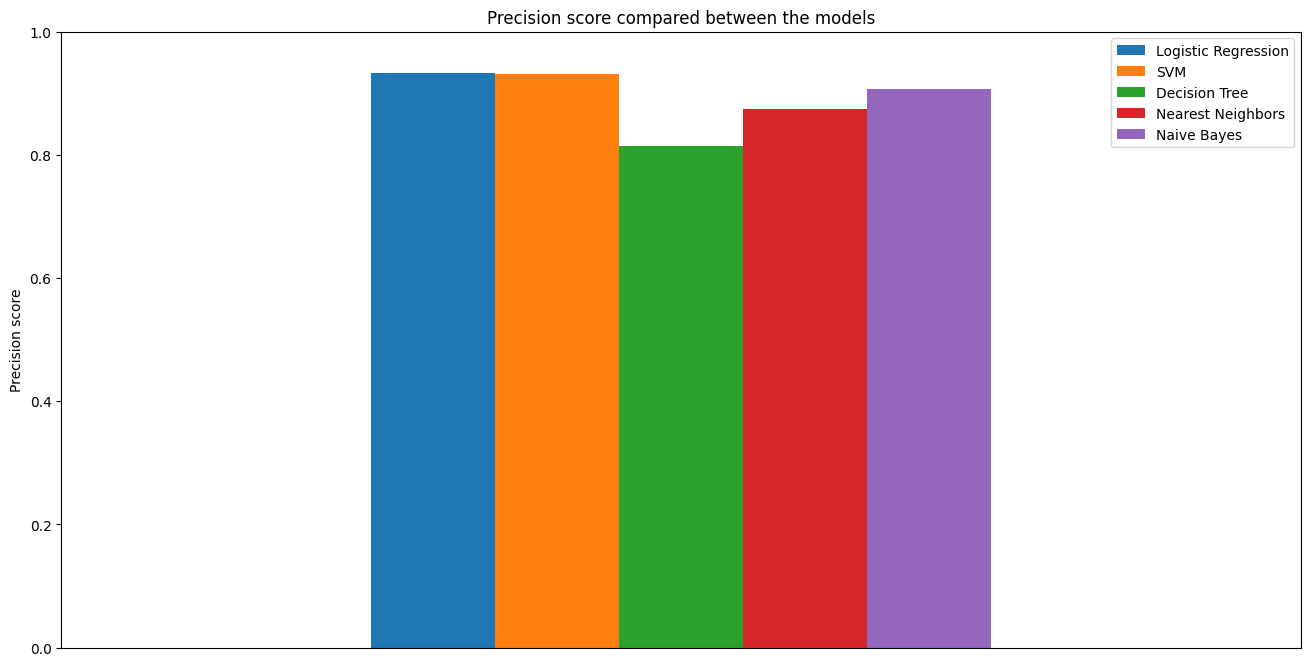

In [86]:
ax = pd.DataFrame(precision_score_dict).plot(kind='bar',
                                             figsize=(16,8),
                                             title="Precision score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Precision score")
ax.set_ylim(0,1)

(0.0, 1.0)

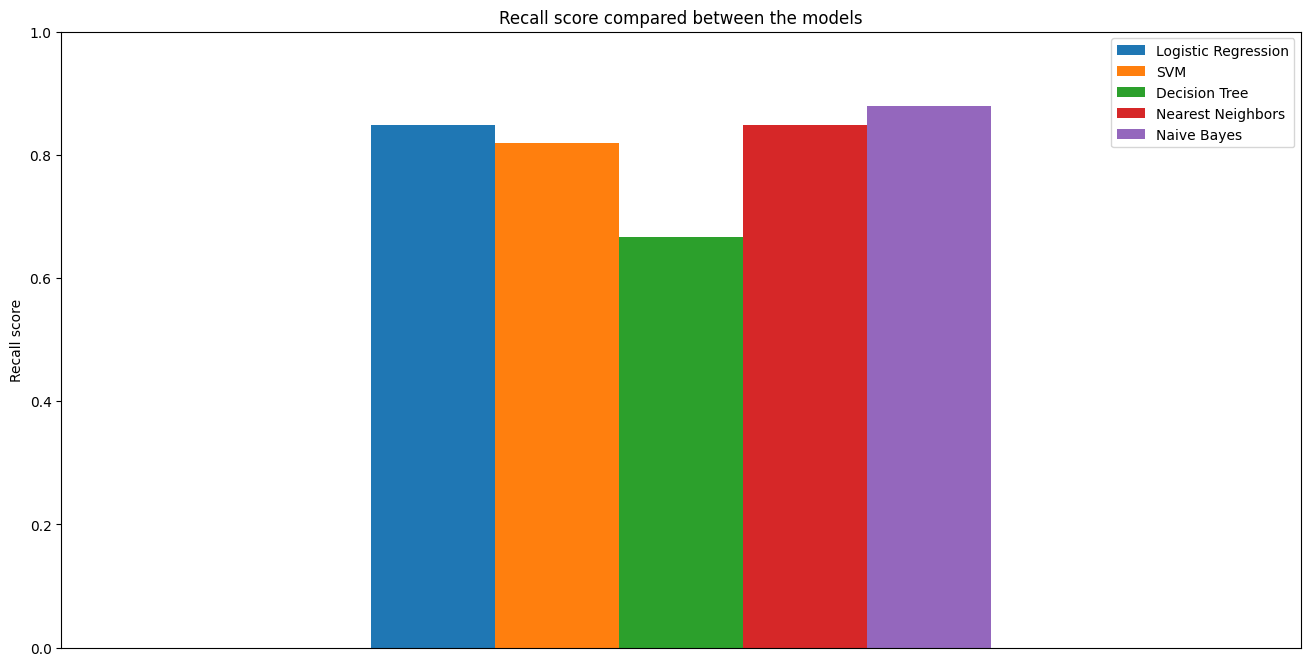

In [87]:
ax = pd.DataFrame(recall_score_dict).plot(kind='bar',
                                          figsize=(16,8),
                                          title="Recall score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Recall score")
ax.set_ylim(0,1)

(0.0, 1.0)

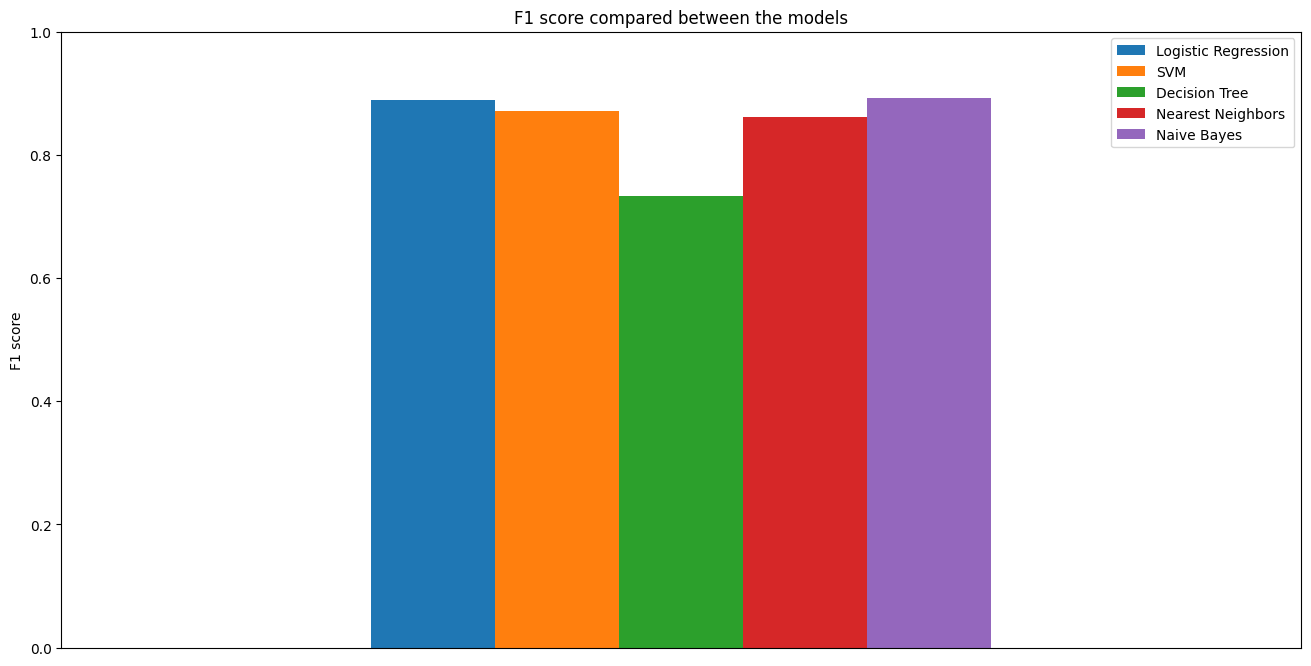

In [88]:
ax = pd.DataFrame(f1_score_dict).plot(kind='bar',
                                      figsize=(16,8),
                                      title="F1 score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("F1 score")
ax.set_ylim(0,1)

(0.0, 1.0)

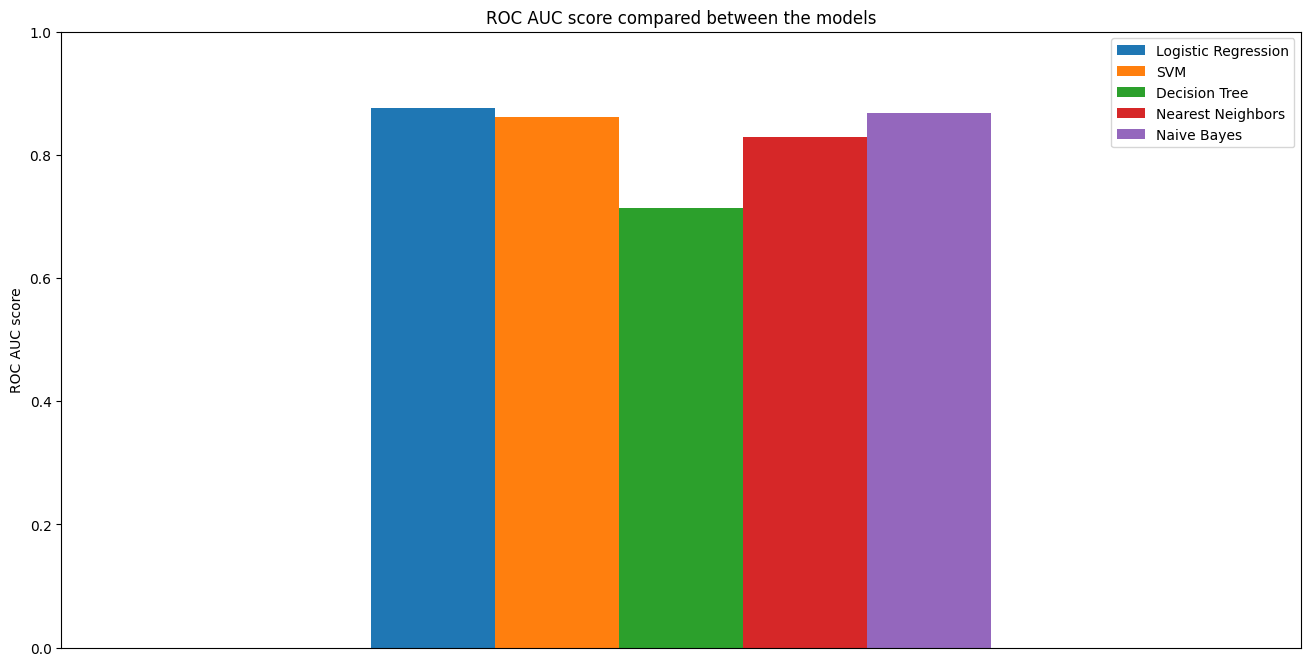

In [89]:
ax = pd.DataFrame(roc_auc_dict).plot(kind='bar',
                                     figsize=(16,8),
                                     title="ROC AUC score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("ROC AUC score")
ax.set_ylim(0,1)

In conclusion, the model that exhibited the most superior performance was Logistic Regression, achieving approximately 88% accuracy, 93% precision, and an F1 score of 89%. 

An impressive F1 score indicates a low occurrence of both false positives and false negatives, signifying that the model is not only accurately identifying genuine threats but also is not producing many false alarms. An F1 score of 1 is deemed perfect, while a score of 0 indicates total failure. Therefore, our model's F1 score of 89% is a commendable result.

Interestingly, despite its lower performance on the training dataset, Logistic Regression outperformed the other classifiers on the test dataset.